# 02 Crash Definition Using Drawdowns

## Objective
The goal of this notebook is to define crypto market crashes objectively
using drawdowns derived from BTC daily price data.

Instead of subjective labels, crashes are identified as large peak-to-trough
declines in price over time.

## Input Data
- Source: btc_daily.csv
- Frequency: Daily
- Asset: BTC


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("btc_daily.csv", index_col="date", parse_dates=True)
df.head()

,open,high,low,close,volume
date,,,,,
2023-05-09,27668.80,27818.00,27353.00,27628.27,40113.31069
2023-05-10,27628.28,28331.42,26777.00,27598.75,71155.11355
2023-05-11,27598.74,27630.14,26702.05,26968.62,47635.31365
2023-05-12,26968.61,27091.12,25811.46,26795.01,67207.93494
2023-05-13,26795.01,27045.45,26692.03,26775.28,22814.90421


In [96]:
df['daily_return'] = df['close'].pct_change()
df[['close', 'daily_return']].head()

,close,daily_return
date,,
2023-05-09,27628.27,NaN
2023-05-10,27598.75,-0.001068
2023-05-11,26968.62,-0.022832
2023-05-12,26795.01,-0.006437
2023-05-13,26775.28,-0.000736


In [97]:
# Rolling peak of BTC price
df['rolling_peak'] = df['close'].cummax()

# Drawdown calculation
df['drawdown'] = (df['close'] - df['rolling_peak']) / df['rolling_peak']

df[['close', 'rolling_peak', 'drawdown']].tail()

,close,rolling_peak,drawdown
date,,,
2026-01-28,89299.99,124658.54,-0.283643
2026-01-29,84650.16,124658.54,-0.320944
2026-01-30,84260.49,124658.54,-0.324070
2026-01-31,78741.09,124658.54,-0.368346
2026-02-01,77261.62,124658.54,-0.380214


## 🔑 Why Drawdowns Matter

In financial risk analysis, losses are not measured by individual price drops,
but by **drawdowns** the decline from a previous peak.

---

## Mathematical Definition

The drawdown at time *t* is defined as:

$$
\text{Drawdown}_t = \frac{Price_t - Peak_t}{Peak_t}
$$

where:

- $Peak_t$ is the highest price observed up to time $t$

---

## Interpretation

- Drawdowns are always **negative**
- A drawdown of **0** means the price is at an all-time high
- A drawdown of **−0.50** means the asset has fallen **50% from its peak**

---

## Why This Is Important

This is the standard way professional investors and risk teams quantify
losses and market stress. It allows crashes to be defined **objectively**,
without relying on subjective opinions.


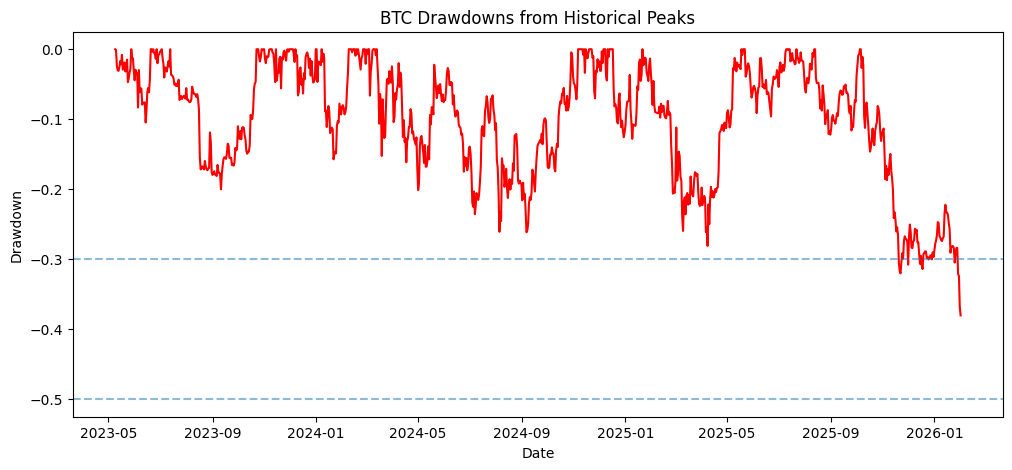

In [98]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['drawdown'], color='red')
plt.axhline(-0.3, linestyle='--', alpha=0.5)
plt.axhline(-0.5, linestyle='--', alpha=0.5)
plt.title("BTC Drawdowns from Historical Peaks")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

## Crash Definition

We define crash regimes using drawdown thresholds:

- Mild stress: drawdown < -20%
- Crash: drawdown < -30%
- Severe crash: drawdown < -50%

These thresholds are chosen to capture historically significant BTC market declines.


In [99]:
def label_crash(dd):
    if dd <= -0.5:
        return "Severe Crash"
    elif dd <= -0.3:
        return "Crash"
    elif dd <= -0.2:
        return "Stress"
    else:
        return "Normal"

df['crash_regime'] = df['drawdown'].apply(label_crash)
df[['close', 'drawdown', 'crash_regime']].tail()


,close,drawdown,crash_regime
date,,,
2026-01-28,89299.99,-0.283643,Stress
2026-01-29,84650.16,-0.320944,Crash
2026-01-30,84260.49,-0.324070,Crash
2026-01-31,78741.09,-0.368346,Crash
2026-02-01,77261.62,-0.380214,Crash


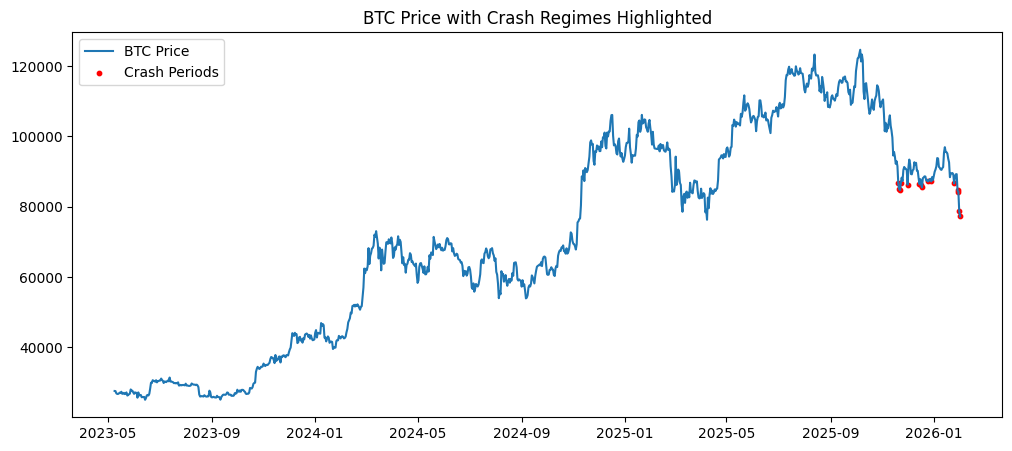

In [94]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'], label="BTC Price")

crash_periods = df[df['crash_regime'].isin(["Crash", "Severe Crash"])]
plt.scatter(crash_periods.index, crash_periods['close'],
            color='red', s=10, label="Crash Periods")

plt.title("BTC Price with Crash Regimes Highlighted")
plt.legend()
plt.show()